# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import os

# Habits of Web Users?

1. Track users history by ip address
2. 

# Data Clean / Prep

#### Prepare Data

In [2]:
# Read CSV
df = pd.read_csv('weblog.csv')
# Remove bracket from time
df['Time']= df['Time'].map(lambda x: x.lstrip('['))
# Split date and time
df[['date','time']]= df['Time'].str.split(':',n = 1, expand = True)
# Drop origional Time column
df.drop(columns=['Time'], inplace = True)
# Replace / with - in date
df['date'] = df['date'].str.replace('/', '-')
# Use properly formatted time to coerce datetime
df['date_time'] = pd.to_datetime(df['time'], errors='coerce')
# Drop origional date and time columns
df.drop(columns=['date'], inplace = True)
df.drop(columns=['time'], inplace = True)

# Rename columns to make them easier to work with
df.rename(columns = {'IP':'ip','URL':'url','Staus':'status'},inplace = True)
# Create a new column for action GET/PUSH
df[['method','url']]= df['url'].str.split('/',n = 1, expand = True)
# create new column for transfer protocol
df[['url','transfer_protocol']]= df['url'].str.split(' ',n = 1, expand = True)
# Turn df variables in to categories
df = df.astype('string')

# Remove nonsense values from ip column (df)
indexNames = df[(df['ip'] == '[Mon')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == '[Tue')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == '[Wed')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == '[Thu')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == '[Fri')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == '[Sat')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == 'chmod:')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == 'rm:')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == 'timeout:')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == 'sh:')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['ip'] == 'a.out:')].index
df.drop(indexNames , inplace=True)

# Set datetime as index
df = df.set_index('date_time').sort_index()

# See what is left
df.head()

,ip,url,status,method,transfer_protocol
date_time,,,,,
2021-02-12 00:00:23,10.128.2.1,,302,GET,HTTP/1.1
2021-02-12 00:00:23,10.128.2.1,login.php,200,GET,HTTP/1.1
2021-02-12 00:00:24,10.130.2.1,css/font-awesome.min.css,200,GET,HTTP/1.1
2021-02-12 00:00:24,10.128.2.1,css/normalize.css,200,GET,HTTP/1.1
2021-02-12 00:00:24,10.131.0.1,css/bootstrap.min.css,200,GET,HTTP/1.1


In [3]:
df.isna().sum()

ip                   0
url                  0
status               0
method               0
transfer_protocol    0
dtype: int64

In [6]:
df.ip.value_counts()

10.128.2.1    4257
10.131.0.1    4198
10.130.2.1    4056
10.129.2.1    1652
10.131.2.1    1626
Name: ip, dtype: Int64

#### Explore IP addresses

In [4]:
# 10.128.2.1 
user_10_128 = df['ip'] == '10.128.2.1'
user_10_128 = df[user_10_128]

#10.131.0.1
user_10_131 = df['ip'] == '10.131.0.1'
user_10_131 = df[user_10_131]

#10.130.2.1
user_10_130 = df['ip'] == '10.130.2.1'
user_10_130 = df[user_10_130]



,ip,url,status,method,transfer_protocol
date_time,,,,,
2021-02-12 00:00:23,10.128.2.1,,302,GET,HTTP/1.1
2021-02-12 00:00:23,10.128.2.1,login.php,200,GET,HTTP/1.1
2021-02-12 00:00:24,10.128.2.1,css/normalize.css,200,GET,HTTP/1.1
2021-02-12 00:00:28,10.128.2.1,fonts/fontawesome-webfont.eot?v=4.6.3,200,GET,HTTP/1.1
2021-02-12 00:03:40,10.128.2.1,fonts/fontawesome-webfont.woff2?v=4.6.3,200,GET,HTTP/1.1


Text(0.5, 1.0, 'Most Popular Methods by user_10_128')

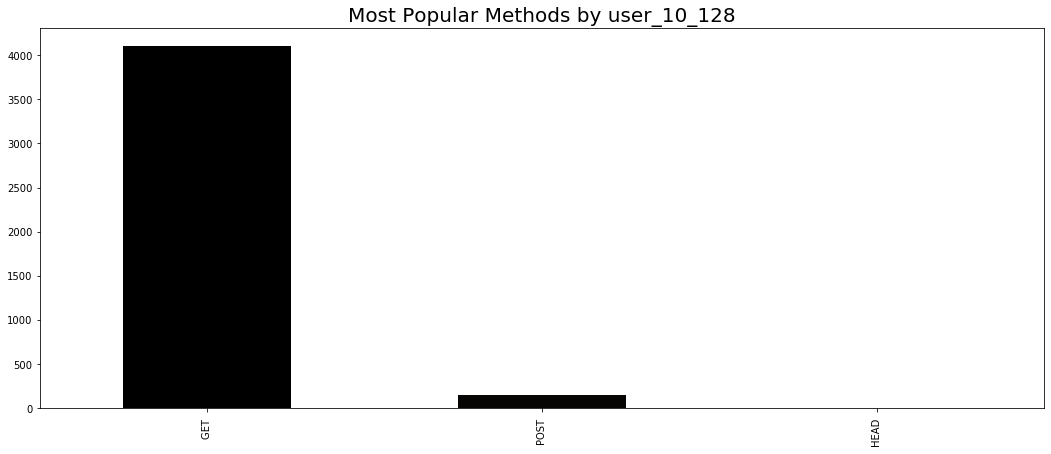

In [5]:
# Visualize status by ip address
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
user_10_128['method'].value_counts().plot.bar(color = color)
plt.title('Most Popular Methods by user_10_128', fontsize = 20)
plt.show()

25

""


In [25]:
# Georges Project
# url = "https://en.wikipedia.org/wiki/List_of_people_who_died_in_traffic_collisions"
# tables = pd.read_html(url)
# df = pd.concat(tables)
# df.reset_index(drop = True)
# df

,Name,Birth,Death,Aged,Nationality,Notability,Mode of transport,Vehicle,Crash location,Details
0,Norifumi Abe,1975.0,2007.0,32 years,Japanese,motorcycle racer,scooter,Yamaha XP 500 TMAX,"Kawasaki, Kanagawa, Japan","Collision with a truck, which made an illegal ..."
1,Anand Abhyankar,1963.0,2012.0,49 years,Indian,actor,car,NaN,"Pune, Maharashtra, India",[3]
2,Frank Adams,1930.0,1989.0,58 years,British,mathematician,car,NaN,"Brampton, Cambridgeshire, England, United Kingdom",NaN
3,Olubayo Adefemi,1985.0,2011.0,25 years,Nigerian,footballer,car,NaN,"Kavala, Greece",Adefemi was driving on Egnatia Odos when he co...
4,Adegoke Adelabu,1915.0,1958.0,42 years,Nigerian,politician,car,NaN,"Lagos-Ibadan Expressway, Nigeria",NaN
...,...,...,...,...,...,...,...,...,...,...
5,Hicham Zerouali,1977.0,2004.0,27 years,Moroccan,footballer,car,NaN,"Rabat, Morocco",[538]
6,Aleksandr Zhirov,1958.0,1983.0,24 years,Russian,alpine skier,car,NaN,"near Yakhroma, Moscow Oblast, Russia",[539]
7,Claudia Zobel,1965.0,1984.0,18 years,Filipina,actress,car,NaN,"Makati, Philippines",[540]
8,Vano Zodelava,1957.0,2019.0,61 years,Georgian,politician,car,NaN,"Tbilisi, Soviet Union",[541]
